In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_curve, roc_auc_score

In [66]:
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('GB_Cleaned_dataset.csv')
df.columns

Index(['customer_number', 'Division', 'Customer_Type1', 'Customer_Type',
       'YearMonth', 'Monthly_SKUs_Purchased', 'Monthly_Vendors_Purchased',
       'Monthly_Number_of_Sales', 'Monthly_Last_Sales_Date',
       'Monthly_First_Sales_Date', 'Monthly_Sales_Days', 'Monthly_Sum_Sales',
       'Monthly_Gross_Margin', 'new_yearMonth', 'difference', 'churn',
       'Backlog_Sales'],
      dtype='object')

In [68]:
X = df[['Division', 'Customer_Type', 'Monthly_SKUs_Purchased', 'Monthly_Vendors_Purchased', 'Monthly_Number_of_Sales']]
Y = df['churn']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

In [70]:
# Define an array with values 1 through 10
neighbors = np.arange(1,21)

# Create empty arrays to store accuracy, AUC for each k
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

train_auc = np.empty(len(neighbors))
test_auc = np.empty(len(neighbors))


# Use a for-loop to calculate accuracy for each k
for i,k in enumerate(neighbors):
    # Define and fit knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    #Compute accuracy for training and testing set
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
    
    # Compute probabilities of class membership
    train_probs = knn.predict_proba(x_train)
    test_probs = knn.predict_proba(x_test)
    
    # Keep one column of probabilities
    train_probs = train_probs[:,1]
    test_probs = test_probs[:,1]
    
    # Calculate AUC
    train_auc[i] = roc_auc_score(y_train, train_probs)
    test_auc[i] = roc_auc_score(y_test, test_probs)

<function matplotlib.pyplot.show(close=None, block=None)>

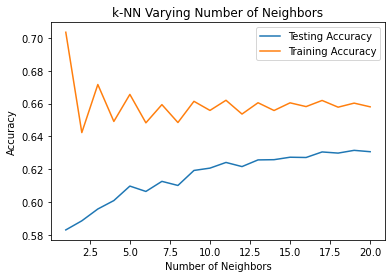

In [71]:
# Create a plot to see the accurcay results
plt.title('k-NN Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

In [72]:
print('the maximum testing accuracy is', max(test_accuracy))
print('the maximum occurs at k=', neighbors[np.argmax(test_accuracy)])

the maximum testing accuracy is 0.6315045612231788
the maximum occurs at k= 19


<function matplotlib.pyplot.show(close=None, block=None)>

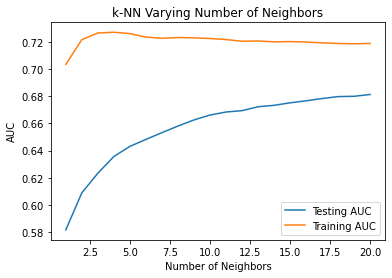

In [73]:
# Create a plot to see the AUC results
plt.title('k-NN Varying Number of Neighbors')
plt.plot(neighbors, test_auc, label='Testing AUC')
plt.plot(neighbors, train_auc, label='Training AUC')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('AUC')
plt.show

In [74]:
print('the maximum auc is', max(test_auc))
print('the maximum occurs at k=', neighbors[np.argmax(test_auc)])

the maximum auc is 0.6813647389329391
the maximum occurs at k= 20


In [75]:
# Define models for k of interest
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train, y_train)

knn27 = KNeighborsClassifier(n_neighbors=27)
knn27.fit(x_train, y_train)

knn47 = KNeighborsClassifier(n_neighbors=47)
knn47.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=47)

In [76]:
# Calculate probabilities of class membership
test_probs3 = knn3.predict_proba(x_test)
test_probs27 = knn27.predict_proba(x_test)
test_probs47 = knn47.predict_proba(x_test)

# Keep only one columns
test_probs3 = test_probs3[:,1]
test_probs27 = test_probs27[:,1]
test_probs47 = test_probs47[:,1]

In [77]:
# Calculate AUCs
auc3 = roc_auc_score(y_test, test_probs3)
auc27 = roc_auc_score(y_test, test_probs27)
auc47 = roc_auc_score(y_test, test_probs47)

In [78]:
# Calculate false positive rate and true positive rate
fpr3, tpr3, _ = roc_curve(y_test, test_probs3)
fpr27, tpr27, _ = roc_curve(y_test, test_probs27)
fpr47, tpr47, _ = roc_curve(y_test, test_probs47)

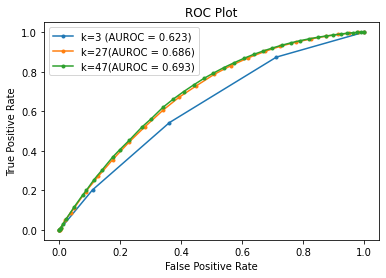

In [57]:
# Plot the ROC curve)
plt.plot(fpr3, tpr3, marker='.', label='k=3 (AUROC = %0.3f)' % auc3)
plt.plot(fpr27, tpr27, marker='.', label='k=27(AUROC = %0.3f)' % auc27)
plt.plot(fpr47, tpr47, marker='.', label='k=47(AUROC = %0.3f)' % auc47)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()